# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset:

In [3]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [4]:
data_football.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [5]:
data_football.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

In [6]:
data_football.shape

(40839, 9)

In [7]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

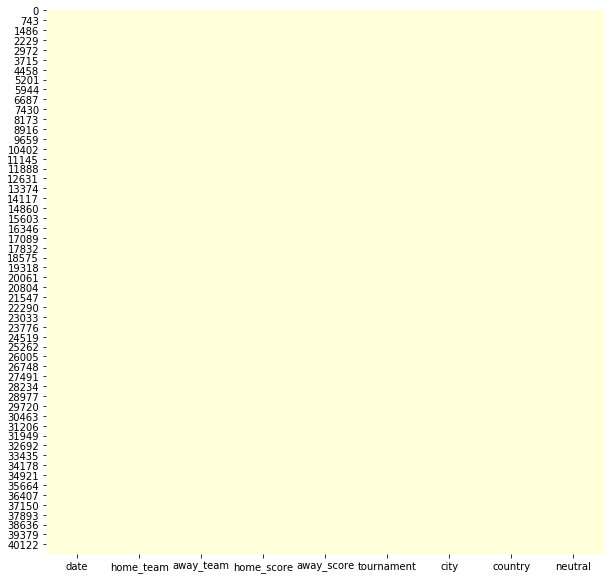

In [8]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

# Method of Parallelising this workflow:

In [9]:
from multiprocessing import  Pool

def parallelize_dataframe(df, func, n_cores=5):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
#     df = pd.concat(pool.map(func, df_split))
    dictionary = (pool.map(func, df_split))
    pool.close()
    pool.join()
#     return df
    return dictionary

From the figure above, it seems like the dataset is complete and does not have missing data.

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw. However, this ranking/leadership board is non-conventional as it only takes into accounts of wining scores from matches played by each team. The ranking board should convey which teams has accumulated the most wins over time.


## THE FOLLOWING IS BASED AROUND THE 'HOME TEAM'

## Remove 'Friendly' matches:

In [10]:
data_football = data_football[data_football.tournament != 'Friendly']

In [11]:
data_football.head()

date         home_team         away_team  home_score  away_score  \
29  1884-01-26  Northern Ireland          Scotland           0           5   
30  1884-02-09             Wales  Northern Ireland           6           0   
31  1884-02-23  Northern Ireland           England           1           8   
32  1884-03-15          Scotland           England           1           0   
33  1884-03-17             Wales           England           0           4   

              tournament     city              country  neutral  
29  British Championship  Belfast  Republic of Ireland    False  
30  British Championship  Wrexham                Wales    False  
31  British Championship  Belfast  Republic of Ireland    False  
32  British Championship  Glasgow             Scotland    False  
33  British Championship  Wrexham                Wales    False

In [12]:
data_football.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

In [13]:
data_football.shape

(23928, 9)

## Calculate the Ranking Points:

- ref 1: https://www.get-digital-help.com/team-ranking-with-criteria/
- ref 2: https://www.goal.com/en-us/news/fifa-world-ranking-how-it-is-calculated-what-it-is-used-for/16w60sntgv7x61a6q08b7ooi0p

Here, Ref 1 is chosen for the calculation, as teh FIFA method requires more information that is not available within the dataset.

Calculations of Rank Points follows:

1. Teams are ranked by total points -> Total points are calculated like this, a match winner gets 3 points, a draw gives 1 point.

2. Teams are then ranked by goal difference ->

3. Teams are then ranked by goal score ->

4. Sum rank values ->

5. Calculating final rank ->

In [14]:
# Rank Points Column:

# Winner: gets 3 points
# Draw: gets 1 point
# Loss: gets 0 points


In [15]:
def task1_matchOutcomes(data):
    data = data.reset_index()
    data = data.drop(['index'], axis = 1)
    data_football = data
    
    data_football['match_outcome'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_score'][idx] > data_football['away_score'][idx]):
#             print('home')
            list_teamOutcomes.append('win')

        elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
#             print('away')
            list_teamOutcomes.append('loss')

        else:
#             print('draw')
            list_teamOutcomes.append('draw')

    data_football['match_outcome'] = list_teamOutcomes
    
    return data_football;

In [16]:
data_football = task1_matchOutcomes(data_football)
data_football

date         home_team         away_team  home_score  away_score  \
0      1884-01-26  Northern Ireland          Scotland           0           5   
1      1884-02-09             Wales  Northern Ireland           6           0   
2      1884-02-23  Northern Ireland           England           1           8   
3      1884-03-15          Scotland           England           1           0   
4      1884-03-17             Wales           England           0           4   
5      1884-03-29          Scotland             Wales           4           1   
6      1885-02-28           England  Northern Ireland           4           0   
7      1885-03-14           England             Wales           1           1   
8      1885-03-14          Scotland  Northern Ireland           8           2   
9      1885-03-21           England          Scotland           1           1   
10     1885-03-23             Wales          Scotland           1           8   
11     1885-04-11  Northern Ireland             Wales           2           8   
12     1886-02-27             Wales  Northern Ireland           5           0   
13     1886-03-13  Northern Ireland           England           1           6   
14     1886-03-20  Northern Ireland          Scotland           2           7   
15     1886-03-27          Scotland           England           1           1   
16     1886-03-29             Wales           England           1           3   
17     1886-04-10          Scotland             Wales           4           1   
18     1887-02-05           England  Northern Ireland           7           0   
19     1887-02-19          Scotland  Northern Ireland           4           1   
20     1887-02-26           England             Wales           4           0   
21     1887-03-12  Northern Ireland             Wales           4           1   
22     1887-03-19           England          Scotland           2           3   
23     1887-03-21             Wales          Scotland           0           2   
24     1888-02-04           England             Wales           5           1   
25     1888-03-03             Wales  Northern Ireland          11           0   
26     1888-03-10          Scotland             Wales           5           1   
27     1888-03-17          Scotland           England           0           5   
28     1888-03-24  Northern Ireland          Scotland           2          10   
29     1888-04-07  Northern Ireland           England           1           5   
...           ...               ...               ...         ...         ...   
23898  2019-07-10           Senegal             Benin           1           0   
23899  2019-07-10  Papua New Guinea           Vanuatu           2           0   
23900  2019-07-10            Tuvalu            Tahiti           0           7   
23901  2019-07-10    American Samoa              Fiji           0           9   
23902  2019-07-10   Solomon Islands     New Caledonia           0           2   
23903  2019-07-10        Tajikistan             Syria           2           0   
23904  2019-07-11       Ivory Coast           Algeria           1           1   
23905  2019-07-11        Madagascar           Tunisia           0           3   
23906  2019-07-12             Samoa             Tonga           2           0   
23907  2019-07-12    American Samoa            Tuvalu           1           1   
23908  2019-07-12   Solomon Islands            Tahiti           0           3   
23909  2019-07-12     New Caledonia              Fiji           1           0   
23910  2019-07-13             India       North Korea           2           5   
23911  2019-07-14           Algeria           Nigeria           2           1   
23912  2019-07-14           Senegal           Tunisia           1           0   
23913  2019-07-15             Tonga           Vanuatu           0          14   
23914  2019-07-15              Fiji            Tuvalu          10           1   
23915  2019-07-15   Solomon Islands    Ameri

In [17]:
def task1_rankPoints_homeTeam(data):
    
    data_football = data
    
    data_football['home_team_rank_points'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['match_outcome'][idx] == 'loss'):
#             print('home')
            list_teamOutcomes.append(int(-1))

        elif (data_football['match_outcome'][idx] == 'win'):
#             print('away')
            list_teamOutcomes.append(int(1))

        else:
            # else it is a DRAW:
#             print('draw')
            list_teamOutcomes.append(int(0))

    data_football['home_team_rank_points'] = list_teamOutcomes
    
    return data_football;

In [18]:
def task1_rankPoints_awayTeam(data):
    
    data_football = data
    
    data_football['away_team_rank_points'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_team_rank_points'][idx] == 1):
#             print('home')
            list_teamOutcomes.append(int(-1))

        elif (data_football['home_team_rank_points'][idx] == -1):
#             print('away')
            list_teamOutcomes.append(int(1))

        else:
            # else it is a DRAW:
#             print('draw')
            list_teamOutcomes.append(int(0))

    data_football['away_team_rank_points'] = list_teamOutcomes
    
    return data_football;

In [19]:
# def task1_rankPoints_sum(data):
    
#     data_football = data
    
#     data_football['overall_rankPoints'] = np.nan

#     list_teamOutcomes = []

#     for idx in range(len(data_football)):
#         data_football['overall_rankPoints'][idx] = data_football['home_team_rank_points'][idx] + data_football['away_team_rank_points'][idx]
        
#     data_football['overall_rankPoints'] = list_teamOutcomes
    
#     return data_football;

In [20]:
data_football = task1_rankPoints_homeTeam(data_football)
data_football = task1_rankPoints_awayTeam(data_football)
# data_football = task1_rankPoints_sum(data_football)

In [21]:
# data_football = task1_rankPoints(data_football)
# data_football

In [22]:
data_football.head()

date         home_team         away_team  home_score  away_score  \
0  1884-01-26  Northern Ireland          Scotland           0           5   
1  1884-02-09             Wales  Northern Ireland           6           0   
2  1884-02-23  Northern Ireland           England           1           8   
3  1884-03-15          Scotland           England           1           0   
4  1884-03-17             Wales           England           0           4   

             tournament     city              country  neutral match_outcome  \
0  British Championship  Belfast  Republic of Ireland    False          loss   
1  British Championship  Wrexham                Wales    False           win   
2  British Championship  Belfast  Republic of Ireland    False          loss   
3  British Championship  Glasgow             Scotland    False           win   
4  British Championship  Wrexham                Wales    False          loss   

   home_team_rank_points  away_team_rank_points  
0                     -1                      1  
1                      1                     -1  
2                     -1                      1  
3                      1                     -1  
4                     -1                      1

## End of Year rankings:

In [23]:
# Data: data_football

# Example Dict: {Tournament: Team: {Year: [list of all scores]}}

# then, calculate the cummulative sum of the scores

# new DataFrame with the sum of the scores per Year.

### For home_team:

In [42]:
def task1_EndYearRanks(data_football):
    # Dict of End of Year Ranks by Tournaments:
    dict_EndYearRanks = {}

    # Step 1 - Make of Copy of the Dataset:
    data_tournaments = data_football.copy()

    # Step 2 - Change the format of the Date column to DateTime:
    data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
    data_tournaments['year'] = data_tournaments['date'].dt.year

    # Step 3 - Take a subset of the DataFrame by Tournament type:
    tournament_list = list(data_tournaments['tournament'].unique())
    data_tournamentTypes_homeTeam = {}

    for i, tournamentName in enumerate(tournament_list):
    #     print(i, tournamentName)
        subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
    #     print(subset_data)

        # List of team names:
        teamNames_list = list(subset_data['home_team'].unique())

        # Dict:
        dict_teamScores = {}

        # Step 4 - Collect the ranking point(Home Team):
        for j, teamNames  in enumerate(teamNames_list):
            print(j, teamNames)

            # Step 5 - Grab a Subset from main dataset:
            print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
            data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
            data_subset_team2 = subset_data.loc[subset_data['away_team'] == teamNames_list[j]]
    #         print(data_subset_team)

            # Step 6 - 
            # List of dates: by YEAR
            years_list = list(subset_data['year'].unique())

            # Dict:
            dict_yearAndScores = {}
            
            input_scores_combine = []
            
            # Step 7 - make a list of the column['home_team_rank_points']:
            for (k, year), (m, year)  in zip(enumerate(years_list), enumerate(years_list)):
                print('HOME_DICT -> At index: ',k, '; Current HomeTeam is: ', years_list[k])
                print('AWAY_DICT -> At index: ',m, '; Current HomeTeam is: ', years_list[m])
                data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
                data_subset_team_byYear2 = data_subset_team2.loc[data_subset_team2['year'] == years_list[m]]
    #             print(data_subset_team_byYear)

                # Dictionaries and Lists:
                input_scores = []
                total_score = 0
                subset_cummulative_scores = []

                # Make a list of the Input Socres from subset of Data:
                for l in data_subset_team_byYear.index:
                    point_values = data_subset_team_byYear['home_team_rank_points'][l]
                    input_scores.append(point_values)
                    
                for l in data_subset_team_byYear2.index:
                    point_values2 = data_subset_team_byYear2['away_team_rank_points'][l]
                    input_scores.append(point_values2)
            
                # Append to Dict {dict_yearAndScores}: dict[key] = value
                dict_yearAndScores[year] = input_scores

            # Append to Dict {dict_teamScores}: dict[key] = value
            dict_teamScores[teamNames] = dict_yearAndScores    

        # Step 8 - Update to the overall Dictionary: 

        # Append to Dict {dict_teamScores}: dict[key] = value
        data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores
        
    return data_tournamentTypes_homeTeam;
    

In [44]:
# Run the Func:
data_tournamentTypes_homeTeam = task1_EndYearRanks(data_football)
# data_tournamentTypes_homeTeam

0 Northern Ireland
At index:  0 ; Current HomeTeam is:  Northern Ireland
HOME_DICT -> At index:  0 ; Current HomeTeam is:  1884
HOME_DICT -> At index:  0 ; Current HomeTeam is:  1884
HOME_DICT -> At index:  1 ; Current HomeTeam is:  1885
HOME_DICT -> At index:  1 ; Current HomeTeam is:  1885
HOME_DICT -> At index:  2 ; Current HomeTeam is:  1886
HOME_DICT -> At index:  2 ; Current HomeTeam is:  1886
HOME_DICT -> At index:  3 ; Current HomeTeam is:  1887
HOME_DICT -> At index:  3 ; Current HomeTeam is:  1887
HOME_DICT -> At index:  4 ; Current HomeTeam is:  1888
HOME_DICT -> At index:  4 ; Current HomeTeam is:  1888
HOME_DICT -> At index:  5 ; Current HomeTeam is:  1889
HOME_DICT -> At index:  5 ; Current HomeTeam is:  1889
HOME_DICT -> At index:  6 ; Current HomeTeam is:  1890
HOME_DICT -> At index:  6 ; Current HomeTeam is:  1890
HOME_DICT -> At index:  7 ; Current HomeTeam is:  1891
HOME_DICT -> At index:  7 ; Current HomeTeam is:  1891
HOME_DICT -> At index:  8 ; Current HomeTeam is

In [27]:
#OLD:
# data_tournamentTypes_homeTeam

{'British Championship': {'Northern Ireland': {1884: [-1, 1, -1, 1],
   1885: [-1, 1],
   1886: [-1, 1, -1, 1],
   1887: [1, -1],
   1888: [-1, 1, -1, 1],
   1889: [-1, 1],
   1890: [-1, 1, -1, 1],
   1891: [1, -1],
   1892: [-1, 1, -1, 1],
   1893: [],
   1894: [0, 0, -1, 1],
   1895: [0, 0],
   1896: [-1, 1, 0, 0],
   1897: [1, -1],
   1898: [-1, 1, -1, 1],
   1899: [1, -1],
   1900: [-1, 1, -1, 1],
   1901: [-1, 1],
   1902: [-1, 1, -1, 1],
   1903: [1, -1],
   1904: [-1, 1, 0, 0],
   1905: [0, 0],
   1906: [-1, 1, -1, 1],
   1907: [-1, 1],
   1908: [-1, 1, -1, 1],
   1909: [-1, 1],
   1910: [0, 0, 1, -1],
   1911: [-1, 1],
   1912: [-1, 1, -1, 1],
   1913: [-1, 1, 1, -1, -1, 1],
   1914: [0, 0],
   1919: [0, 0],
   1920: [0, 0],
   1921: [-1, 1, 0, 0],
   1922: [],
   1923: [-1, 1, 1, -1],
   1924: [-1, 1],
   1925: [-1, 1, 0, 0],
   1926: [1, -1],
   1927: [-1, 1, 1, -1],
   1928: [-1, 1],
   1929: [-1, 1, -1, 1],
   1930: [1, -1],
   1931: [0, 0, -1, 1, 1, -1],
   1932: [-1, 1],


In [45]:
# CHECK NEW:
data_tournamentTypes_homeTeam


{'British Championship': {'Northern Ireland': {1884: [-1, -1, -1],
   1885: [-1, -1, -1],
   1886: [-1, -1, -1],
   1887: [1, -1, -1],
   1888: [-1, -1, -1],
   1889: [-1, -1, -1],
   1890: [-1, -1, -1],
   1891: [1, -1, -1],
   1892: [-1, -1, 0],
   1893: [-1, -1],
   1894: [0, -1, -1],
   1895: [0, -1, -1],
   1896: [-1, 0, -1],
   1897: [1, -1, -1],
   1898: [-1, -1, 1],
   1899: [1, -1, -1],
   1900: [-1, -1, -1],
   1901: [-1, -1, -1],
   1902: [-1, -1, 1],
   1903: [1, 1],
   1904: [-1, 0, 1],
   1905: [0, 0, -1],
   1906: [-1, -1, 0],
   1907: [-1, -1, -1],
   1908: [-1, -1, 1],
   1909: [-1, -1, -1],
   1910: [0, 1, -1],
   1911: [-1, -1, -1],
   1912: [-1, -1, 1],
   1913: [-1, 1, -1],
   1914: [0, 1, 1],
   1919: [0],
   1920: [0, -1, -1],
   1921: [-1, 0, -1],
   1922: [-1, -1],
   1923: [-1, 1, 1],
   1924: [-1, -1, -1],
   1925: [-1, 0, 0],
   1926: [1, -1, 0],
   1927: [-1, 1, 0],
   1928: [-1, 1, -1],
   1929: [-1, -1, 0],
   1930: [1, -1, -1],
   1931: [0, -1, 1, -1, -1

In [ ]:
# To access the Dict: need 3 things.
tournament_list = list(data_tournaments['tournament'].unique())
teamNames_list = list(subset_data['home_team'].unique())
years_list = list(subset_data['year'].unique())

data_tournamentTypes_homeTeam['British Championship']['Northern Ireland'][1884]

### Away Team: use Dict update method.

## Find the Winning teams in each of the tournaments.
This is done by taking the last teams (a.k.a Winning Teams) in each competition year, for individual types of tournament.

In [ ]:
def task1_football_processing(data_football):
    print('Start of Processing...')
    
    # Step 1 - make copy of dataset:
    data_football_tournaments = data_football.copy()
    
    # Step 2 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 3 - Partition each competition into a Dictionary:
    
    tournament_list = list(data_football_tournaments['tournament'].unique())
    data_football_tournamentTypes = {}
    
    for i, j in enumerate(tournament_list):
    
        data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
    # Step 4 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
    #          This step should make a Nested Dictionary of the required data.
    dict_winners_inEachYear_allTournaments = {}

    # For all tournaments:
    for i, dataframe_tournaments in data_football_tournamentTypes.items():
    #     print(i, pd.DataFrame(dataframe_tournaments))
        print('Tournament index (OuterLoop):', i)

        # Time Calculations:
        dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
        inYear = dataframe_tournaments['year'].unique()
#         print(inYear)

        # Number of Games played in each year: 
        nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
#         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

        dict_winners_inEachYear = {}
        df_forAppend = []

        # for individual tournaments:
        for k in range(len(nb_gamesPlayed_inThisTournament)):
            print(k)
            idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
            print('index: ' , idx_game)

            gameYear = nb_gamesPlayed_inThisTournament.index[k]
            print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

            # take out the winners from this game (from the main Dataframe):
            temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
            temp_df = temp_series.to_frame()
            temp_df = temp_df.transpose()        
            df_forAppend.append(temp_df)

            # Find index for key/value: key part -> key_tournamentName
            index_temp_df = temp_df.index
            key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

            # Append to the Dictionary for a specific Tournament:
            dict_winners_inEachYear[key_tournamentName] = df_forAppend

    #         print(dict_winners_inEachYear)

            # ==== End of Loop ====
        dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
        print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
        data_final = dict_winners_inEachYear_allTournaments
        
    return data_final; 


In [ ]:
def task1_football_convert2DataFrame(data, data_football):
    
    dict_winners_inEachYear_allTournaments = data
    
    categorical = list(data_football['tournament'].unique())

    champion_df = pd.DataFrame()

    for i, tournament_names in enumerate(categorical):
        print(i, tournament_names)
        dict_temp = dict_winners_inEachYear_allTournaments[i]
        dict_temp_tour = dict_temp[tournament_names]
        champion_df = champion_df.append(dict_temp_tour, ignore_index = True)

    return champion_df; 


### Perform the processing on the dataset for Task 1:
This will be a 2 stage process.

In [ ]:
# # Part 1 - Process the Dataset:
# data_football_task1 = task1_football_processing(data_football)
# type(data_football_task1)

In [ ]:
# Part 2 - Extract the information into single Dataframe:
# data_football_task1_df = task1_football_convert2DataFrame(data_football_task1, data_football)

In [ ]:
# data_football_task1_df.head()

### Label which Teams won their Championships:

In [ ]:
# def task1_winningTeam(data):
    
#     data_football = data
    
#     data_football['winning_team'] = np.nan

#     list_teamOutcomes = []

#     for idx in range(len(data_football)):
# #         print(idx)
#         if (data_football['home_score'][idx] > data_football['away_score'][idx]):
# #             print('home')
#             list_teamOutcomes.append('home')

#         elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
# #             print('away')
#             list_teamOutcomes.append('away')

#         else:
# #             print('draw')
#             list_teamOutcomes.append('draw')

#     data_football['winning_team'] = list_teamOutcomes
    
#     return data_football;

In [ ]:
# data_football_task1_v2 = task1_winningTeam(data_football_task1_df)
# data_football_task1_v2.head()

In [ ]:
# data_football_task1_v2.head(20)

## Cummulative count of the Ranking points over the years:

In [ ]:
def task1_createDict_rankingCummulative(data):
    
    homeTeam_list = list(data['home_team'].unique())

    dict_homeTeam_withTotalScores = {}

    for i, home_team_name in enumerate(homeTeam_list):
#         print(i, home_team_name)

        # Step 1 - Grab a Subset from main dataset:
        print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
        data_subset = data.loc[data['home_team'] == homeTeam_list[i]]

        # Step 2 - Perform Calculations on Ranking Points: 2 stages.
        input_scores = []
        total_score = 0
        subset_cummulative_scores = []

        # Make a list of Input Scores from subset of Data:
        for j in data_subset.index:
            point_values = data_subset['rank_points'][j]
            input_scores.append(point_values)
        print('input scores: ', input_scores)

        # Cummulative Calculations:
        for values in input_scores:
            total_score = total_score + values
            subset_cummulative_scores.append(total_score)

        print('Subset Cummulative scores: ', subset_cummulative_scores)

        # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
        dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores
    
    return dict_homeTeam_withTotalScores;


In [ ]:
def task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football_task1_v2):
   
    data_rankingOverTime = data_football_task1_v2.copy()

    homeTeam_list = list(data_rankingOverTime['home_team'].unique())

    data_football_rankingOverTime = pd.DataFrame()

    for i, home_team_name in enumerate(homeTeam_list):
        print(i, home_team_name)

        # Get the indexes from subset data:
        data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
        index_df = data_subset.index

        # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
        list_score = dict_homeTeam_withTotalScores[home_team_name]
        df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)

        # Combine the temporary Dataframe with the Subset of Data taken:
        mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)

        # Append to the main Dataset with mergeDf:
        data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)

    
    return data_football_rankingOverTime; 

In [ ]:
# Output Dictionary:
# dict_homeTeam_withTotalScores = task1_createDict_rankingCummulative(data_football)


In [ ]:
# Output DataFrame:
# data_football_rankingOverTime2 = task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football)


In [ ]:
# data_football_rankingOverTime2.head()

# Save the output into CSV format:

In [ ]:
# IGNORE THIS ONE: better method of saving is in the next chunk of code.

# # path_directory
# data_football_grouped.to_csv(path_directory, 'football_task1', sep='\t')

In [ ]:
# USE THIS ONE:

import os
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))
# data_football_grouped.to_csv(os.path.join(path_directory, r'football_task1.csv'))
# champion_df.to_csv(os.path.join(path_directory, r'champion_df.csv'))
# data_football_task1_v2.to_csv(os.path.join(path_directory, r'data_football_task1_v2.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_task1_withRankPoints.csv'))

# data_football_rankingOverTime.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime_v5.csv'))

In [ ]:
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))

## Backup codes:

In [ ]:
# # Plot:

# categorical = list(data_football['tournament'].unique())

# # categorical = ['British Championship', 'Copa Lipton', 'Copa Newton']


# # fig, ax = plt.subplots(len(data_football_tournamentTypes_rankedTop5),1, figsize=(16, 25))
# # fig, ax = plt.subplots(len(categorical),1, figsize=(16, len(categorical)))

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))



# for i, (tournament_name, subplot) in enumerate(zip(categorical, ax.flatten())):
#     plt.figure(i)
#     fig.subplots_adjust(hspace=.5)
# #     sns.barplot(x='home_team',
# #                 y='match_scores',
# #                 data=data_football_tournamentTypes_rankedTop5[i]).set(xlabel='Home Teams', ylabel='Match Scores')
#     sns.countplot(x='home_team',
#                   y='match_scores',
#                   data=data_football_tournamentTypes_rankedTop5[i])
    
#     # Add Suplot Titles:
#     ax[i].set_title(tournament_name) 



# # Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament') 

In [ ]:
# subset_test = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[2]]
# len(subset_test)


# input_scores = []
# total_score = 0
# subset_test_scores = []

# print(type(subset_test_scores))

# # Make a list of Input Scores from subset of Data:
# for j in subset_test.index:
#     print(j)
#     point_values = subset_test['rank_points'][j]
#     input_scores.append(point_values)
# #     print('Current taken point is: ', point_values)
# print('input scores: ', input_scores)

# # Cummulative Calculations:
# for values in input_scores:
#     total_score = total_score + values
#     subset_test_scores.append(total_score)

# print('Subset Cummulative scores: ', subset_test_scores)
# subset_test_scores


# subset_test['rank_test'] = pd.DataFrame(subset_test_scores, index = subset_test.index)



In [ ]:
# homeTeam_list = list(data_football_task1_v2['home_team'].unique())

# dict_homeTeam_withTotalScores = {}


# # for i in range(len(homeTeam_list)):
# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)

#     # Step 1 - Grab a Subset from main dataset:
#     print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
#     data_subset = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[i]]

#     # Step 2 - Perform Calculations on Ranking Points: 2 stages.
#     input_scores = []
#     total_score = 0
#     subset_cummulative_scores = []

#     # Make a list of Input Scores from subset of Data:
#     for j in data_subset.index:
#         point_values = data_subset['rank_points'][j]
#         input_scores.append(point_values)
#     print('input scores: ', input_scores)

#     # Cummulative Calculations:
#     for values in input_scores:
#         total_score = total_score + values
#         subset_cummulative_scores.append(total_score)

#     print('Subset Cummulative scores: ', subset_cummulative_scores)

#     # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
#     dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores

In [ ]:
# data_rankingOverTime = data_football_task1_v2.copy()

# homeTeam_list = list(data_rankingOverTime['home_team'].unique())

# data_football_rankingOverTime = pd.DataFrame()

# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)
    
# #     data_freshCopy = data_football_task1_v2.copy()
    
#     # Get the indexes from subset data:
#     data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
# #     print(data_subset)
#     index_df = data_subset.index
    
#     # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
#     list_score = dict_homeTeam_withTotalScores[home_team_name]
#     print(list_score, type(list_score))
    
#     df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)
#     print(df_temp)

#     # Combine the temporary Dataframe with the Subset of Data taken:
#     mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)
#     print(mergedDf)
    
#     # Append to the main Dataset with mergeDf:
#     data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)
    

In [ ]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_awayTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list = list(subset_data['away_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current AwayTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['away_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}

#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current AwayTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['away_team_rank_points'][l]
#                 input_scores.append(point_values)
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores

#         # Step 8 - Update both the Home and Away team score to the overall Dictionary: 
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_awayTeam[tournamentName] = dict_teamScores           
            

In [ ]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_homeTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list_home = list(subset_data['home_team'].unique())
#     teamNames_list_away = list(subset_data['away_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}

#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current HomeTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['home_team_rank_points'][l]
#                 input_scores.append(point_values)
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores
            
            
            
            
            
            

#         # Step 8 - Update both the Home and Away team score to the overall Dictionary: 
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores           
            



In [ ]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_homeTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list = list(subset_data['home_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}
               
#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current HomeTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['home_team_rank_points'][l]
#                 input_scores.append(point_values)
                
#                 point_values2 = data_subset_team_byYear['away_team_rank_points'][l]
#                 input_scores.append(point_values2)
                
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores    

#         # Step 8 - Update XXX to the overall Dictionary: 
            
# #         # Append to Dict {dict_teamScores}: dict[key] = value
# #         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores           
            



In [ ]:
def task1_football_processing(data_football):
    print('Start of Processing...')
    
    # Step 1 - make copy of dataset:
    data_football_tournaments = data_football.copy()
    
    # Step 2 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 3 - Partition each competition into a Dictionary:
    
    tournament_list = list(data_football_tournaments['tournament'].unique())
    data_football_tournamentTypes = {}
    
    for i, j in enumerate(tournament_list):
    
        data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
    # Step 4 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
    #          This step should make a Nested Dictionary of the required data.
    dict_winners_inEachYear_allTournaments = {}

    # For all tournaments:
    for i, dataframe_tournaments in data_football_tournamentTypes.items():
    #     print(i, pd.DataFrame(dataframe_tournaments))
        print('Tournament index (OuterLoop):', i)

        # Time Calculations:
        dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
        inYear = dataframe_tournaments['year'].unique()
#         print(inYear)

        # Number of Games played in each year: 
        nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
#         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

        dict_winners_inEachYear = {}
        df_forAppend = []

        # for individual tournaments:
        for k in range(len(nb_gamesPlayed_inThisTournament)):
            print(k)
            idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
            print('index: ' , idx_game)

            gameYear = nb_gamesPlayed_inThisTournament.index[k]
            print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

            # take out the winners from this game (from the main Dataframe):
            temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
            temp_df = temp_series.to_frame()
            temp_df = temp_df.transpose()        
            df_forAppend.append(temp_df)

            # Find index for key/value: key part -> key_tournamentName
            index_temp_df = temp_df.index
            key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

            # Append to the Dictionary for a specific Tournament:
            dict_winners_inEachYear[key_tournamentName] = df_forAppend

    #         print(dict_winners_inEachYear)

            # ==== End of Loop ====
        dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
        print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
        data_final = dict_winners_inEachYear_allTournaments
        
    return data_final; 

